In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
import seaborn as sns
from IPython.display import display
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/Salary.csv')
display(df.head())

target = 'Salary'
features= [i for i in df.columns if i not in [target]]
print(features)

original_df = df.copy(deep=True)

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1


['Gender', 'Age', 'PhD']


In [ ]:
df.info()
df.nunique().sort_values()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  100 non-null    float64
 1   Gender  100 non-null    int64  
 2   Age     100 non-null    int64  
 3   PhD     100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


Gender     2
PhD        2
Age       43
Salary    73
dtype: int64

In [ ]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=2:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('Inference: The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

Inference: The Datset has 1 numerical & 2 categorical features.


In [ ]:
display(df.describe())

,Salary,Gender,Age,PhD
count,100.000000,100.000000,100.000000,100.000000
mean,52.524500,0.500000,46.880000,0.390000
std,42.220933,0.502519,15.271469,0.490207
min,0.250000,0.000000,20.000000,0.000000
25%,20.000000,0.000000,31.500000,0.000000
50%,39.300000,0.500000,49.000000,0.000000
75%,75.500000,1.000000,60.000000,1.000000
max,190.000000,1.000000,77.000000,1.000000


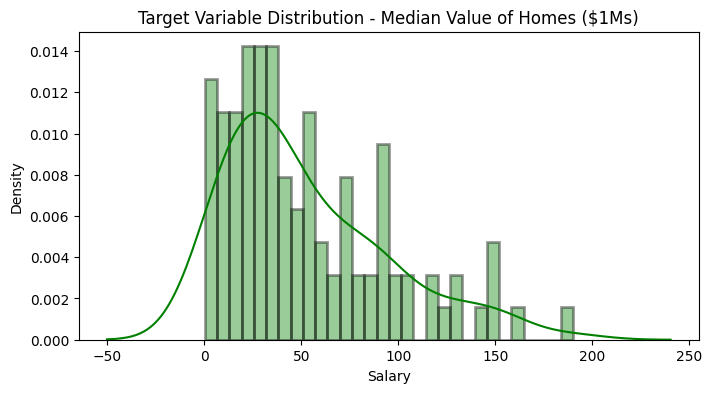

In [ ]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

                                   Numeric Features Distribution                                    


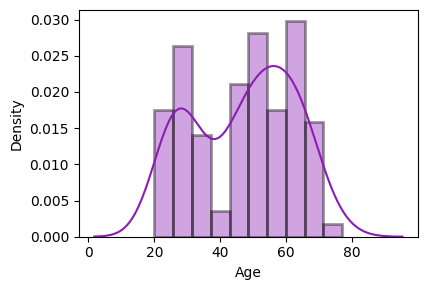

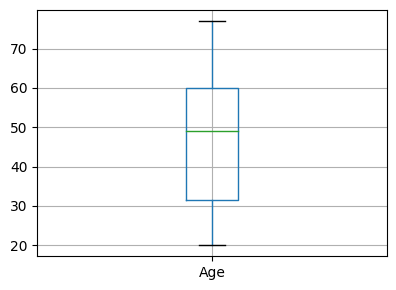

In [ ]:
#Visualising the numeric features

print('Numeric Features Distribution'.center(100))
plt.figure(figsize=[15,3])
plt.subplot(1,4,1)
sns.distplot(df[nf[0]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()
plt.figure(figsize=[15,3])
plt.subplot(1,4,1)
df.boxplot(nf[0])
plt.tight_layout()
plt.show()

Histogram of  Gender


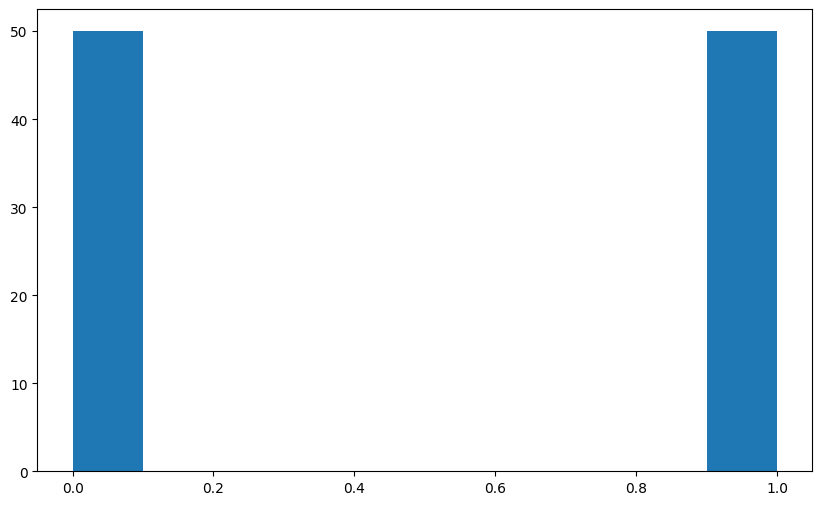

Histogram of  Age


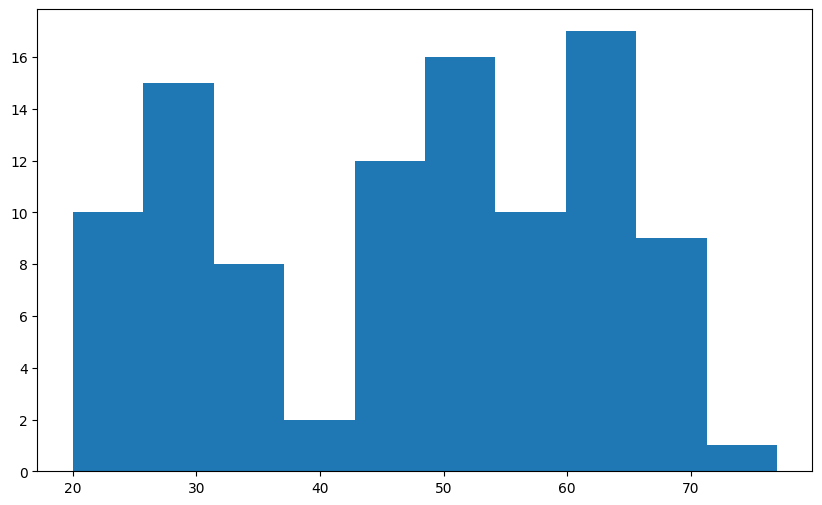

Histogram of  PhD


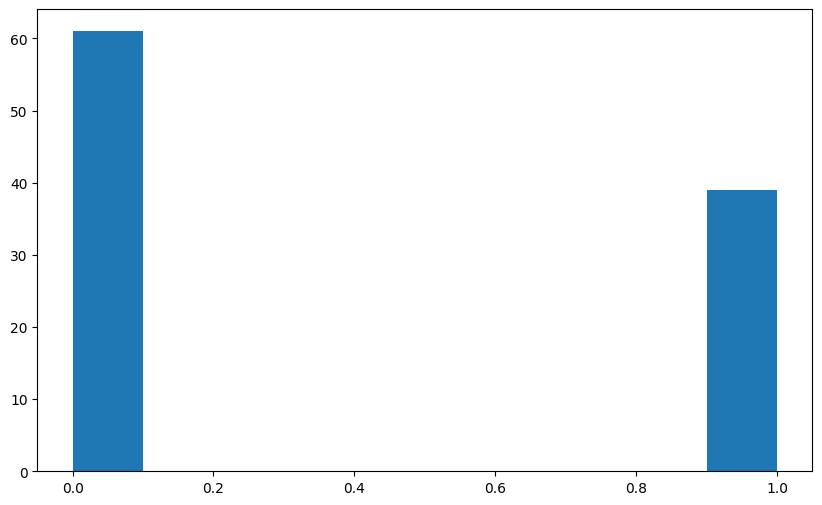

In [ ]:
for feature in features:
    print('Histogram of ', feature)
    plt.hist(df[feature])
    plt.show()

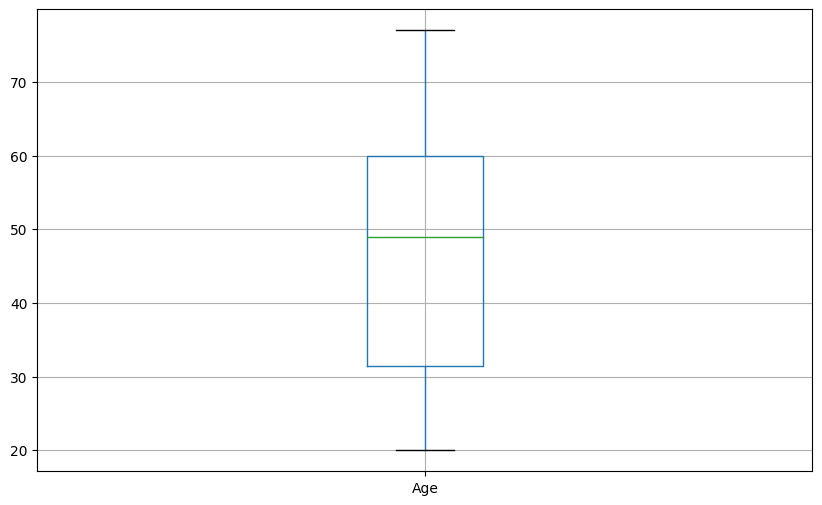

In [ ]:

df.boxplot(column=features[1])
plt.show()

In [ ]:
df[features].corr()

,Gender,Age,PhD
Gender,1.000000,0.160580,0.184521
Age,0.160580,1.000000,0.353081
PhD,0.184521,0.353081,1.000000


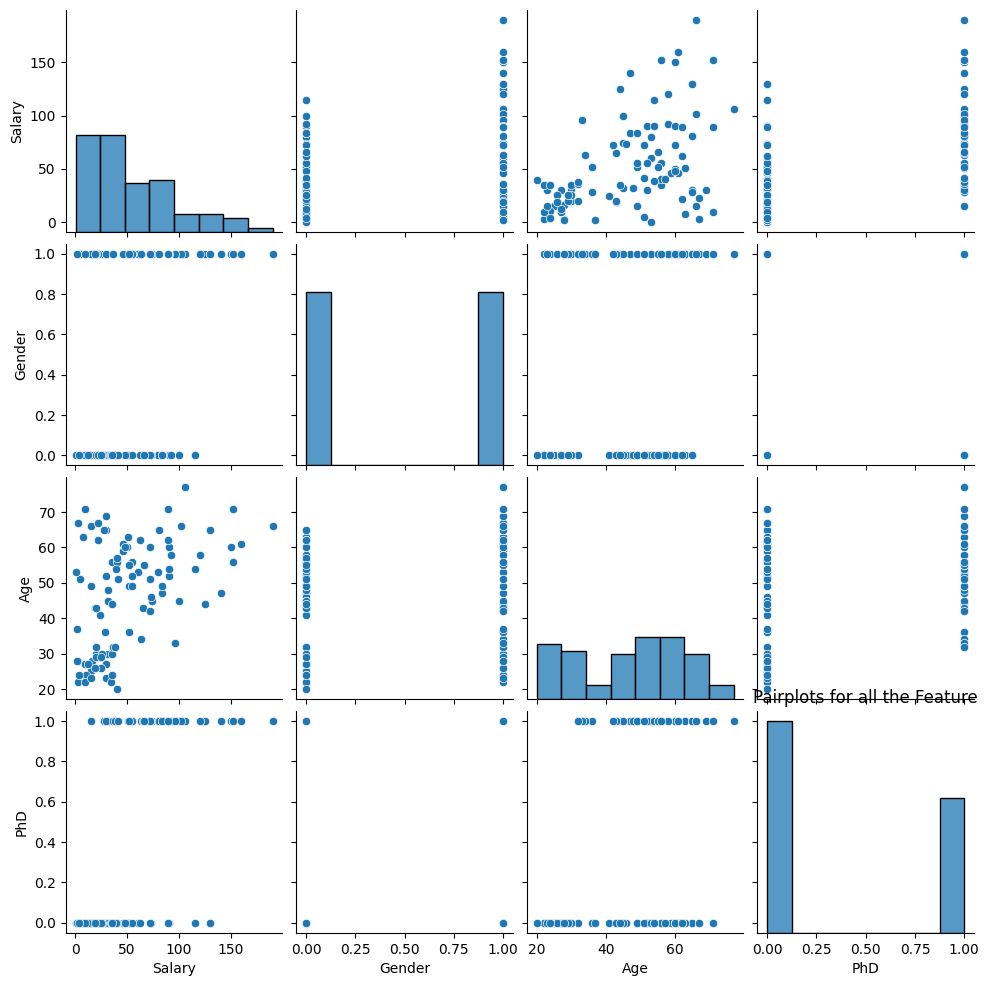

In [ ]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')

plt.show()

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Gender'), Text(0, 1.5, 'Age'), Text(0, 2.5, 'PhD')])

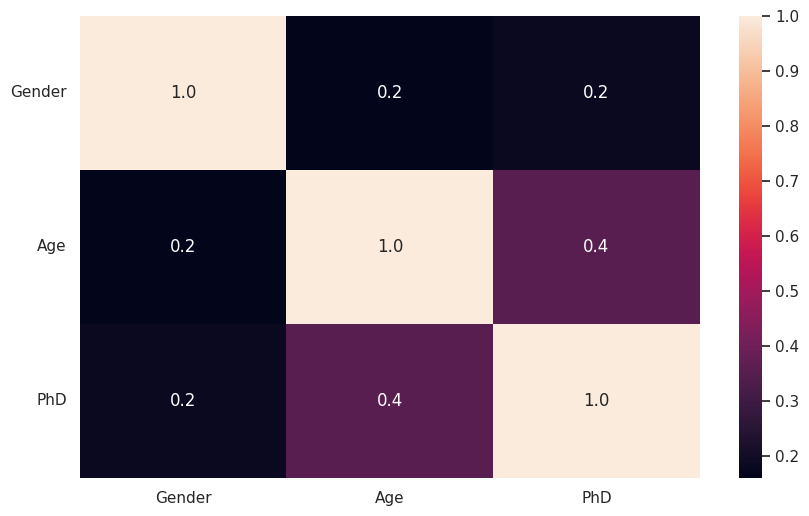

In [ ]:
sns.set()
sns.heatmap(df[features].corr(), annot=True, fmt='.1f')
plt.yticks(rotation = 0)

In [ ]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('No duplicates')
else:
    print(f' Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')

 Number of duplicates dropped/fixed ---> 1


In [ ]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

        Total Null Values  Percentage
Salary                  0         0.0
Gender                  0         0.0
Age                     0         0.0
PhD                     0         0.0


In [ ]:
df3 = df.copy()
df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1



Inference:
Before removal of outliers, The dataset had 99 samples.
After removal of outliers, The dataset now has 99 samples.


In [ ]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (99, 3) (99,) 
Training set  --->  (79, 3) (79,) 
Testing set   --->  (20, 3)  (20,)


In [ ]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Gender,Age,PhD
count,7.900000e+01,7.900000e+01,7.900000e+01
mean,-3.372829e-17,-7.149696e-17,-2.810691e-17
std,1.006390e+00,1.006390e+00,1.006390e+00
min,-9.627197e-01,-1.658134e+00,-8.469896e-01
25%,-9.627197e-01,-1.049611e+00,-8.469896e-01
50%,-9.627197e-01,1.994625e-01,-8.469896e-01
75%,1.038724e+00,9.040681e-01,1.180652e+00
max,1.038724e+00,1.993004e+00,1.180652e+00



                                          Standardardization on Testing set                                          


,Gender,Age,PhD
count,20.000000,20.000000,20.000000
mean,0.138074,0.257112,-0.238697
std,1.021572,0.837216,0.953321
min,-0.962720,-1.209748,-0.846990
25%,-0.962720,-0.328992,-0.846990
50%,1.038724,0.519738,-0.846990
75%,1.038724,0.856027,1.180652
max,1.038724,1.608674,1.180652


                                       Correlation Matrix                                       


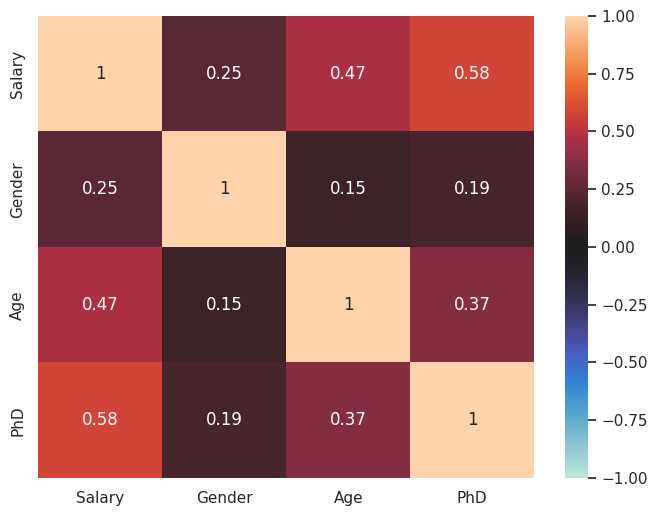

In [ ]:
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[8,6])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

Dropped Features -->  ['PhD', 'Gender']


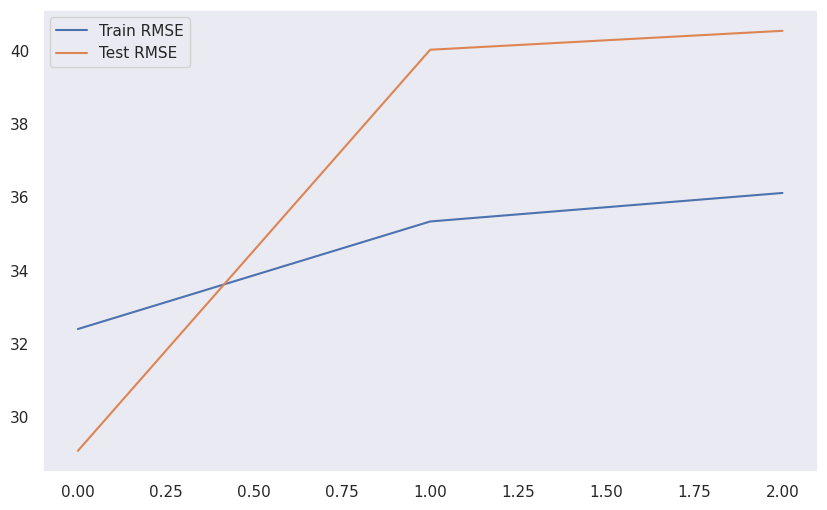

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
DROP=[];b=[]
LR = LinearRegression()
LR.fit(Train_X_std, Train_Y)

pred1 = LR.predict(Train_X_std)
pred2 = LR.predict(Test_X_std)

Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

for i in range(len(Train_X_std.columns)-1):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))

        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
print('Dropped Features --> ',DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

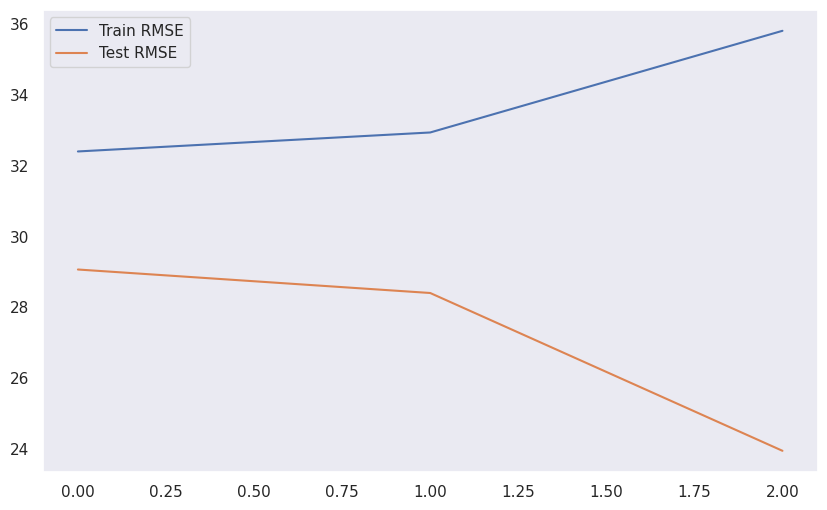

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-1
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)
    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

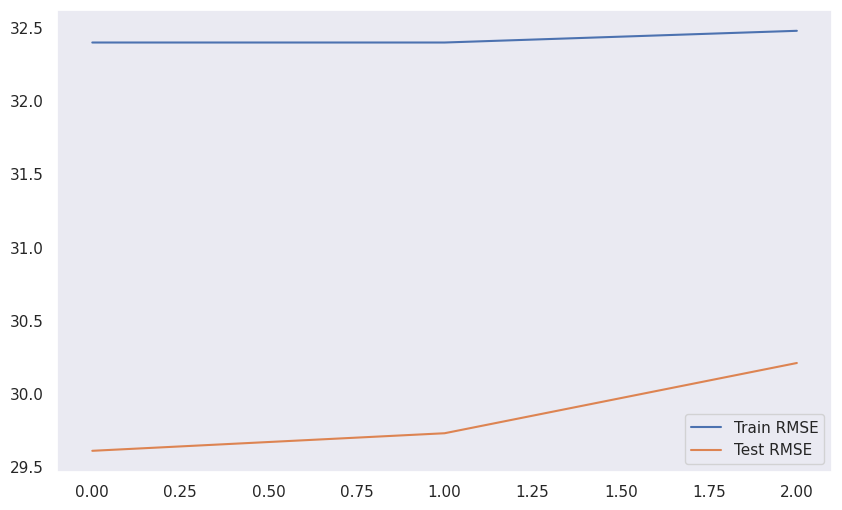

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)

    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

In [ ]:

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=30].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


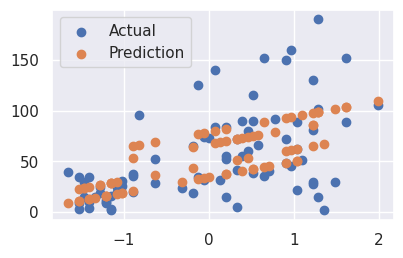



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4389762890726776
Residual Sum of Squares (RSS) on Training set  ---> 82906.39794704922
Mean Squared Error (MSE) on Training set       ---> 1049.448075279104
Root Mean Squared Error (RMSE) on Training set ---> 32.3951859892655

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.1874213681268623
Residual Sum of Squares (RSS) on Training set  ---> 16896.121689082363
Mean Squared Error (MSE) on Training set       ---> 844.806084454118
Root Mean Squared Error (RMSE) on Training set ---> 29.065548067327374

--------------------Residual Plots--------------------


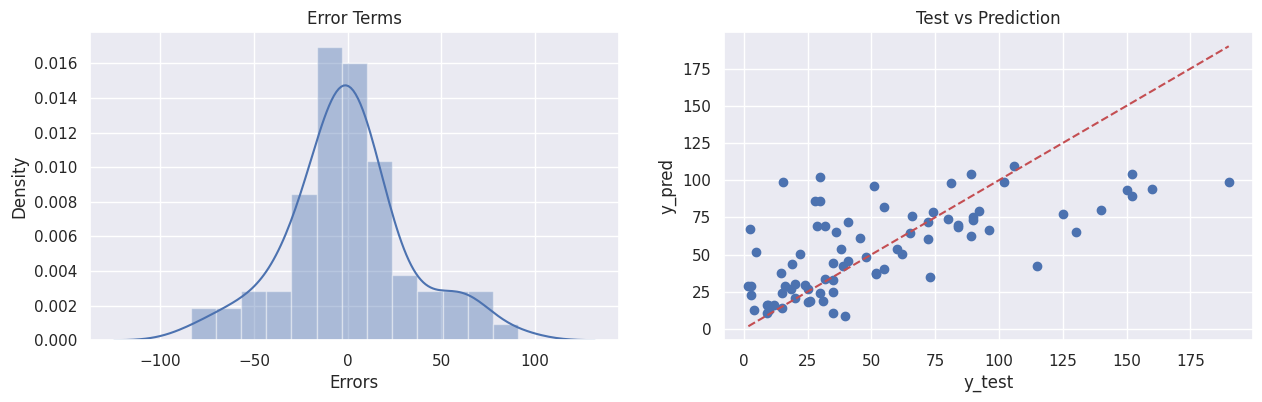

In [ ]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)
print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


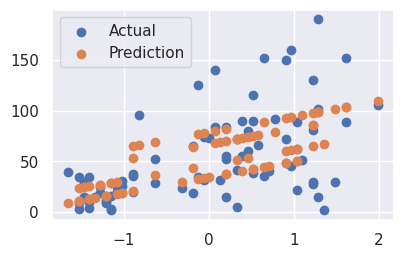



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4389472255123041
Residual Sum of Squares (RSS) on Training set  ---> 82910.69287265603
Mean Squared Error (MSE) on Training set       ---> 1049.5024414260256
Root Mean Squared Error (RMSE) on Training set ---> 32.39602508682239

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.18838394459286167
Residual Sum of Squares (RSS) on Training set  ---> 16876.10663027251
Mean Squared Error (MSE) on Training set       ---> 843.8053315136254
Root Mean Squared Error (RMSE) on Training set ---> 29.04832751663382

--------------------Residual Plots--------------------


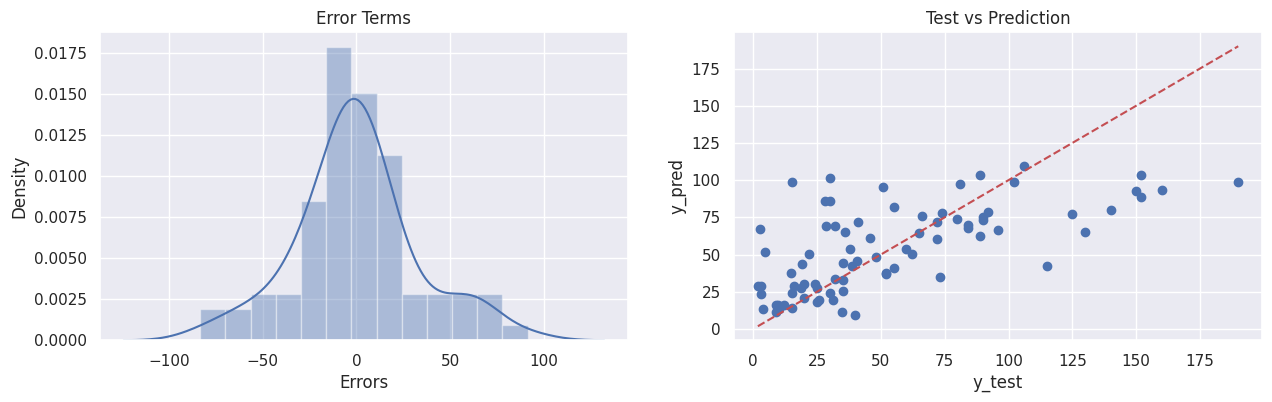

In [ ]:
RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


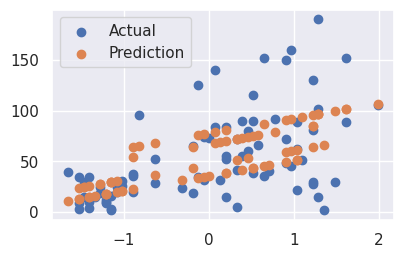



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.43790153073667926
Residual Sum of Squares (RSS) on Training set  ---> 83065.22250395414
Mean Squared Error (MSE) on Training set       ---> 1051.4585127082803
Root Mean Squared Error (RMSE) on Training set ---> 32.426201021832334

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.19977033472461792
Residual Sum of Squares (RSS) on Training set  ---> 16639.346979305516
Mean Squared Error (MSE) on Training set       ---> 831.9673489652757
Root Mean Squared Error (RMSE) on Training set ---> 28.843844212678647

--------------------Residual Plots--------------------


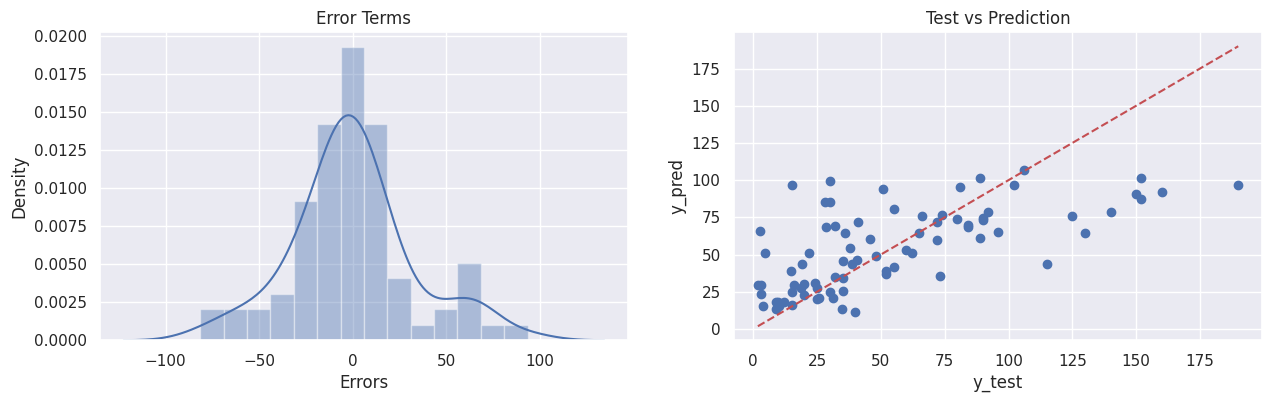

In [ ]:
LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


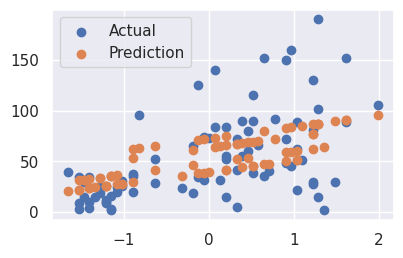



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.40892962437998787
Residual Sum of Squares (RSS) on Training set  ---> 87346.60375559906
Mean Squared Error (MSE) on Training set       ---> 1105.6532120961906
Root Mean Squared Error (RMSE) on Training set ---> 33.251364063692044

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.19490958400213443
Residual Sum of Squares (RSS) on Training set  ---> 16740.41761110155
Mean Squared Error (MSE) on Training set       ---> 837.0208805550776
Root Mean Squared Error (RMSE) on Training set ---> 28.931313149511162

--------------------Residual Plots--------------------


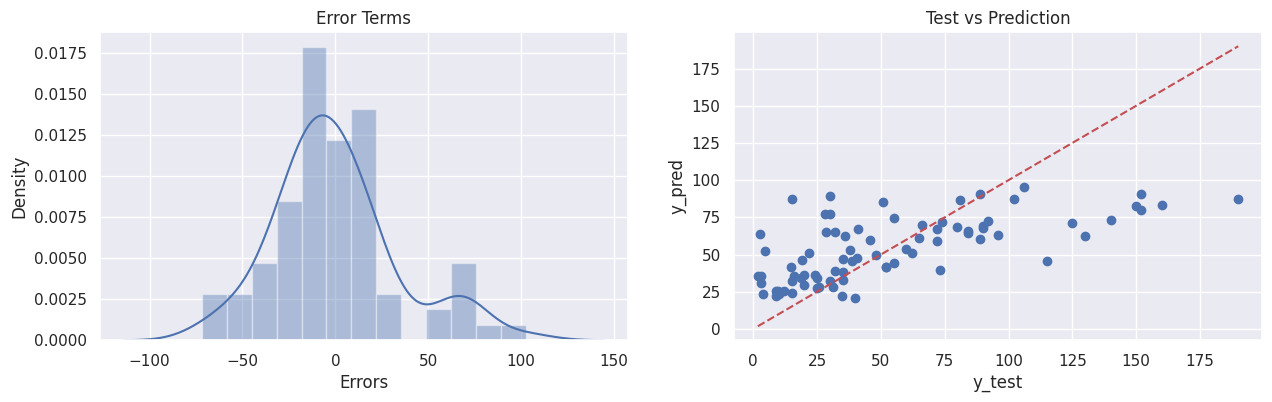

In [ ]:
ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)
Evaluate(3, pred1, pred2)

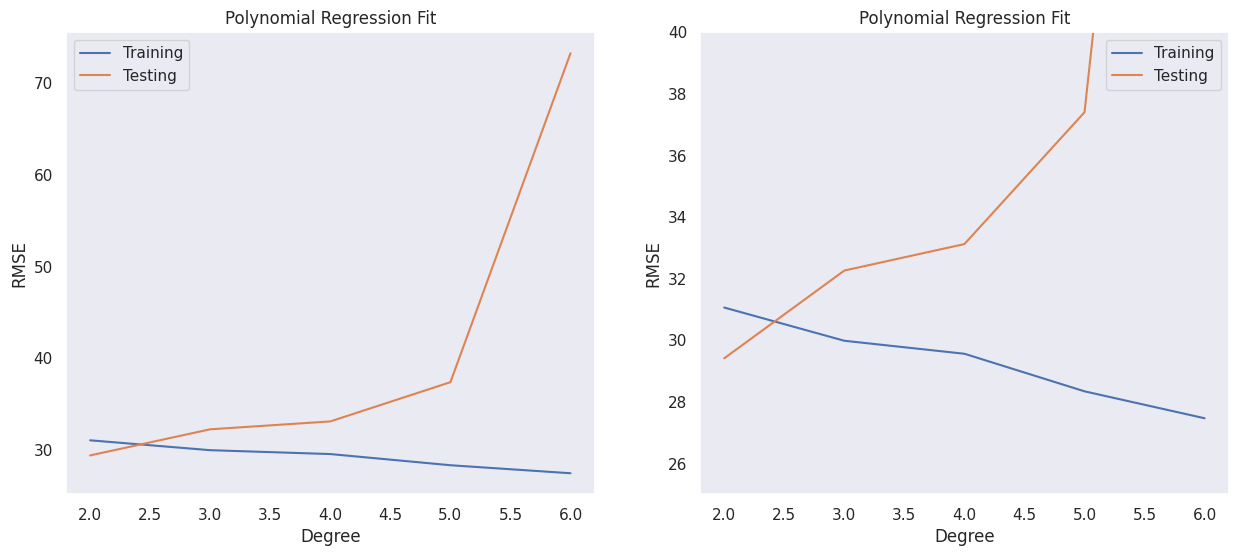

In [ ]:
Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([25,40])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.00966484 15.37959586 16.08049821]
The Intercept of the Regresion Model was found to be  53.91392405063291


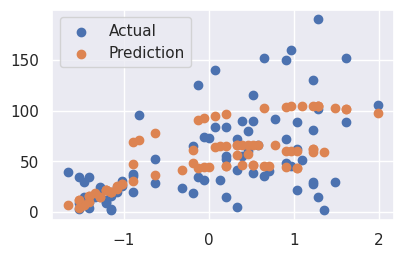



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.48420718533033125
Residual Sum of Squares (RSS) on Training set  ---> 76222.31203125
Mean Squared Error (MSE) on Training set       ---> 964.8393928006328
Root Mean Squared Error (RMSE) on Training set ---> 31.061863962110078

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.16783506416140637
Residual Sum of Squares (RSS) on Training set  ---> 17303.38390625
Mean Squared Error (MSE) on Training set       ---> 865.1691953125
Root Mean Squared Error (RMSE) on Training set ---> 29.413758605667862

--------------------Residual Plots--------------------


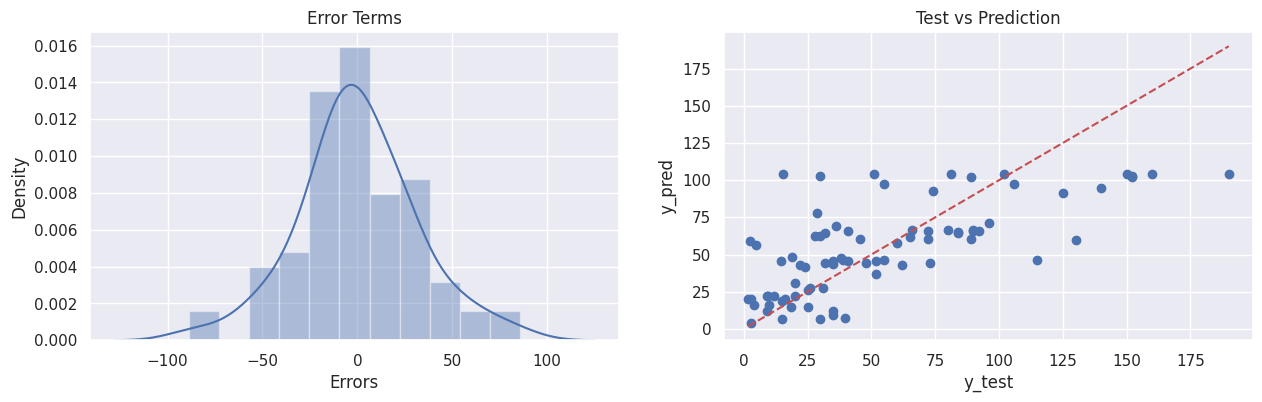

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

Gender
Age
PhD


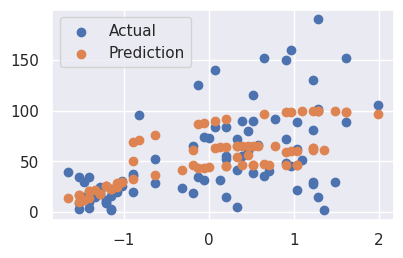



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.47957071453034683
Mean Squared Error (MSE) on Training set ---> 973.512351291262
Root Mean Squared Error (RMSE) on Training set ---> 31.201159454277683

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.17730794882483303
Mean Squared Error (MSE) on Testing set ---> 855.3206092346859
Root Mean Squared Error (RMSE) on Testing set ---> 29.245864822820437

--------------------Residual Plots--------------------


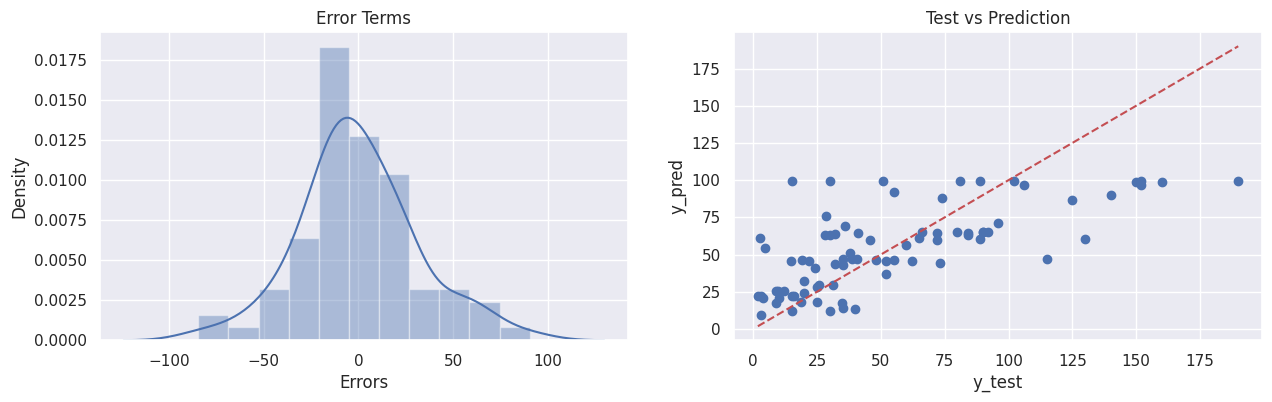

In [ ]:
from sklearn.linear_model import BayesianRidge
import joblib

# Create an instance of BayesianRidge

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
BR = BayesianRidge()
BR.fit(X_poly, Train_Y)
joblib.dump(BR, 'model.pkl')

pred1 = BR.predict(X_poly)
pred2 = BR.predict(X_poly1)


# Fit the model with training data

# Make predictions on training and testing data


# Evaluate the model's performance
Evaluate('Bayesian Ridge Regression', pred1, pred2)

# Function to evaluate model and update evaluation comparison matrix
def Evaluate(model_name, pred_train, pred_test):
    # Plotting predicted values against actual values
    plt.figure(figsize=[15, 6])
    for e, i in enumerate(rc):
        plt.subplot(2, 3, e + 1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred_train, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    # Evaluating the model
    print('\n\n{}Training Set Metrics{}'.format('-' * 20, '-' * 20))
    print('\nR2-Score on Training set --->', round(r2_score(Train_Y, pred_train), 20))
    print('Mean Squared Error (MSE) on Training set --->', round(mean_squared_error(Train_Y, pred_train), 20))
    print('Root Mean Squared Error (RMSE) on Training set --->', round(np.sqrt(mean_squared_error(Train_Y, pred_train)), 20))

    print('\n{}Testing Set Metrics{}'.format('-' * 20, '-' * 20))
    print('\nR2-Score on Testing set --->', round(r2_score(Test_Y, pred_test), 20))
    print('Mean Squared Error (MSE) on Testing set --->', round(mean_squared_error(Test_Y, pred_test), 20))
    print('Root Mean Squared Error (RMSE) on Testing set --->', round(np.sqrt(mean_squared_error(Test_Y, pred_test)), 20))
    print('\n{}Residual Plots{}'.format('-' * 20, '-' * 20))

    Model_Evaluation_Comparison_Matrix.loc[model_name, 'Train-R2'] = round(r2_score(Train_Y, pred_train), 20)
    Model_Evaluation_Comparison_Matrix.loc[model_name, 'Test-R2'] = round(r2_score(Test_Y, pred_test), 20)
    Model_Evaluation_Comparison_Matrix.loc[model_name, 'Train-MSE'] = round(mean_squared_error(Train_Y, pred_train), 20)
    Model_Evaluation_Comparison_Matrix.loc[model_name, 'Test-MSE'] = round(mean_squared_error(Test_Y, pred_test), 20)
    Model_Evaluation_Comparison_Matrix.loc[model_name, 'Train-RMSE'] = round(np.sqrt(mean_squared_error(Train_Y, pred_train)), 20)
    Model_Evaluation_Comparison_Matrix.loc[model_name, 'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred_test)), 20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15, 4])

    plt.subplot(1, 2, 1)
    sns.distplot((Train_Y - pred_train))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1, 2, 2)
    plt.scatter(Train_Y, pred_train)
    plt.plot([Train_Y.min(), Train_Y.max()], [Train_Y.min(), Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()


In [ ]:
from google.colab import files

files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Train_X_std.to_csv('train_x_std.csv', index=False)

In [ ]:
EMC = Model_Evaluation_Comparison_Matrix.copy()

# Update the index with meaningful labels for each regression model, including Bayesian Ridge Regression
EMC.index = [
    'Multiple Linear Regression (MLR)',
    'Ridge Linear Regression (RLR)',
    'Lasso Linear Regression (LLR)',
    'Elastic-Net Regression (ENR)',
    'Polynomial Regression (PNR)',
    'Bayesian Ridge Regression (BR)'
]
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.438976,0.187421,82906.397947,16896.121689,1049.448075,844.806084,32.395186,29.065548
Ridge Linear Regression (RLR),0.438947,0.188384,82910.692873,16876.106630,1049.502441,843.805332,32.396025,29.048328
Lasso Linear Regression (LLR),0.437902,0.199770,83065.222504,16639.346979,1051.458513,831.967349,32.426201,28.843844
Elastic-Net Regression (ENR),0.408930,0.194910,87346.603756,16740.417611,1105.653212,837.020881,33.251364,28.931313
Polynomial Regression (PNR),0.484207,0.167835,76222.312031,17303.383906,964.839393,865.169195,31.061864,29.413759
Bayesian Ridge Regression (BR),0.479571,0.177308,76907.475752,17106.412185,973.512351,855.320609,31.201159,29.245865


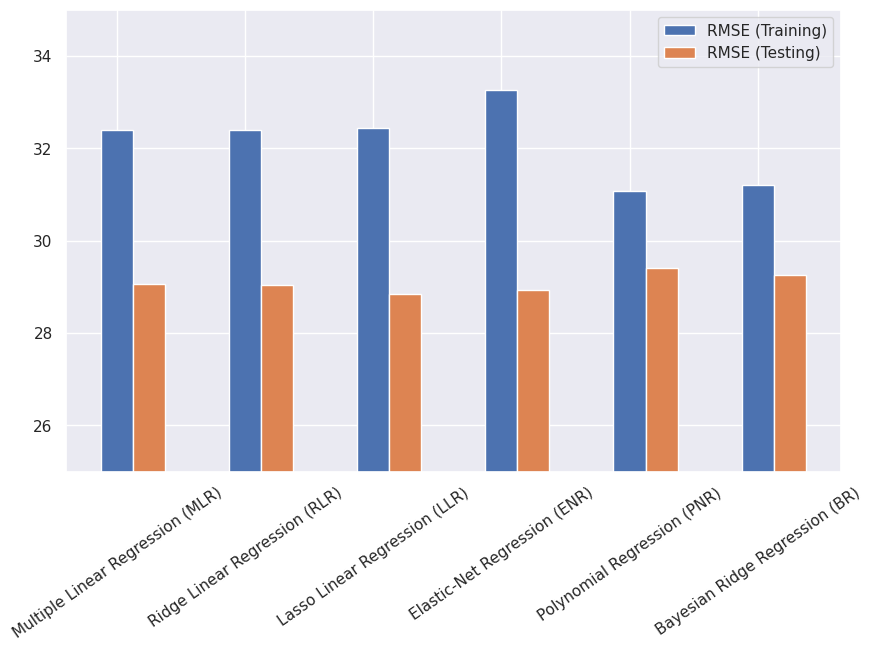

In [ ]:
cc = Model_Evaluation_Comparison_Matrix.columns.values
plt.bar(np.arange(6), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.25, label='RMSE (Training)')
plt.bar(np.arange(6) + 0.25, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.25, label='RMSE (Testing)')
#plt.bar(np.arange(6) + 0.5, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.25, label='Bayesian Ridge')
plt.xticks(np.arange(6), EMC.index, rotation=35)
plt.legend()
plt.ylim([25, 35])
plt.show()


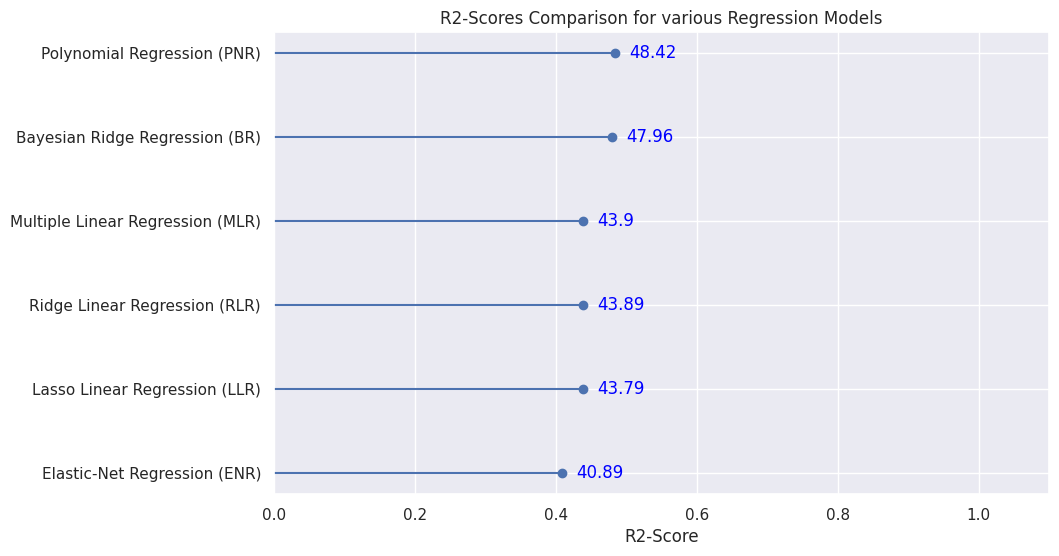

In [ ]:
R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()


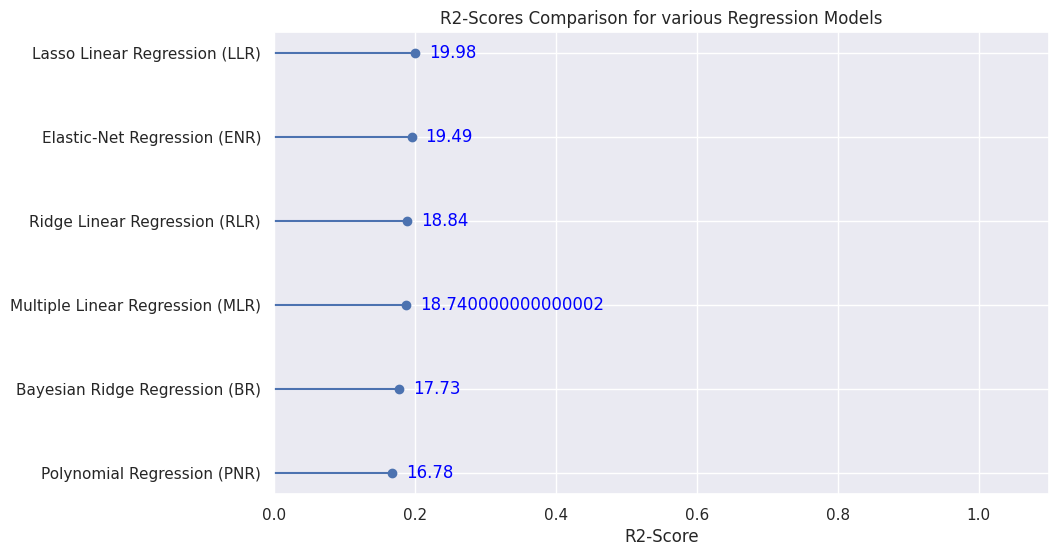

In [ ]:
R2 = round(EMC['Test-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()
